#### Nama: Andre Zuliani
#### NIM: 202131031

# Import Library

In [1]:
import cv2 #untuk mengimpor modul cv2 dari pustaka OpenCV
import numpy as np #untuk mengimpor modul numpy dan memberikan alias np. 
import matplotlib.pyplot as plt #untuk mengimpor modul pyplot dari pustaka Matplotlib. 
import matplotlib.patches as patches # untuk mengimpor modul patches dari pustaka Matplotlib.

# Plat Terdeteksi, Binary Image, & Edges Image

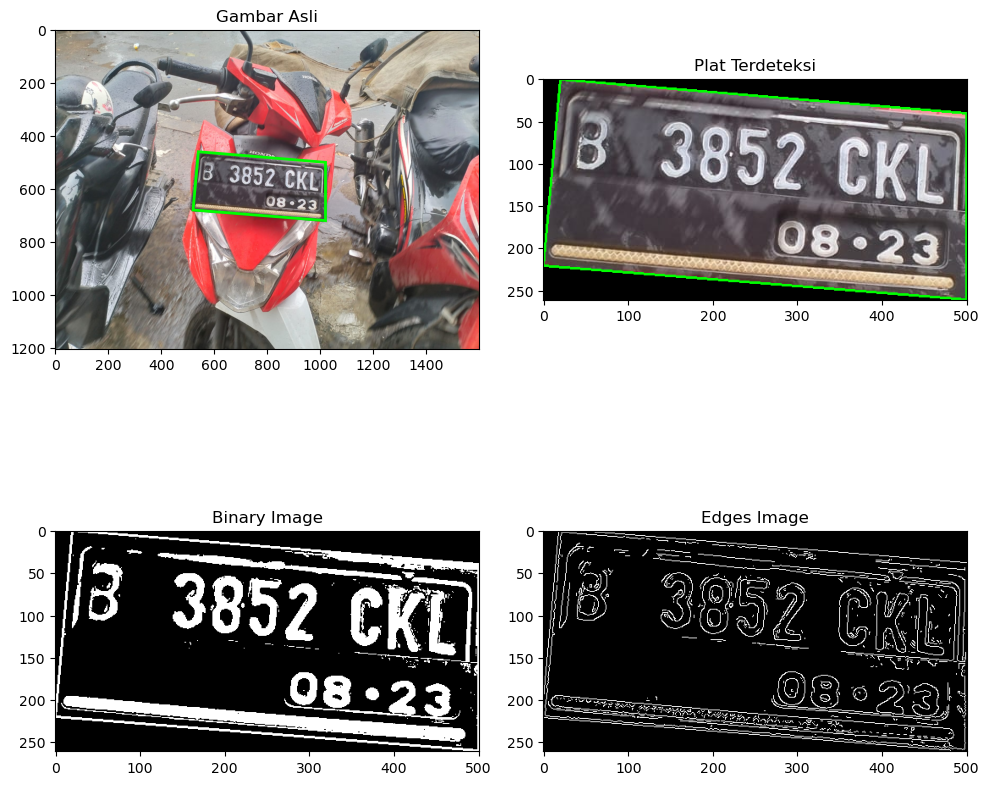

In [2]:
image = cv2.imread("plat.jpg") 
#untuk membaca gambar dengan nama file "plat.jpg" menggunakan fungsi imread dari modul cv2.

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
#untuk mengubah format warna gambar dari BGR (Blue-Green-Red) menjadi RGB (Red-Green-Blue).

vertices = np.array([[540, 460], [520, 680], [1020, 720], [1020, 500]], dtype=np.int32) 
#untuk membuat array NumPy vertices yang berisi sekumpulan titik koordinat.

mask = np.zeros(image.shape[:2], dtype=np.uint8) 
#untuk membuat array NumPy mask yang berisi matriks nol dengan dimensi yang sama dengan gambar image.

cv2.fillPoly(mask, [vertices], (255)) 
#untuk mengisi poligon yang didefinisikan oleh vertices dalam array mask dengan nilai piksel 255.

masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
#untuk menerapkan operasi bitwise AND pada dua gambar dengan menggunakan mask sebagai masker.

cv2.polylines(masked_image, [vertices.reshape((-1, 1, 2))], True, (0, 255, 0), thickness=2)
#untuk menggambar poligon dengan garis tepi pada masked_image menggunakan vertices sebagai titik koordinat.

x, y, w, h = cv2.boundingRect(vertices)
#untuk menghitung kotak pembatas (bounding box) dari poligon yang didefinisikan oleh vertices.

cropped_image = masked_image[y:y+h, x:x+w]
#untuk memotong bagian gambar masked_image sesuai dengan kotak pembatas yang didefinisikan oleh x, y, w, dan h.

gray = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
#untuk mengubah gambar yang dipotong (cropped_image) menjadi citra dalam skala abu-abu (grayscale).

ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#untuk melakukan thresholding pada citra dalam skala abu-abu (gray) dengan menggunakan metode binary thresholding.

edges = cv2.Canny(gray, 170, 200)
#untuk mendeteksi tepi pada citra dalam skala abu-abu (gray) menggunakan operator Canny.

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
#untuk membuat sebuah objek gambar (figure) dan sekelompok sumbu (axes) dengan tata letak 2x2.

axs[0, 0].imshow(image_rgb) # untuk menampilkan gambar asli (image_rgb) pada sumbu yang terletak pada indeks [0, 0].
axs[0, 0].add_patch(patches.Polygon(vertices, closed=True, linewidth=2, edgecolor='lime', facecolor='none')) 
#untuk menambahkan poligon dengan tepi pada gambar tersebut.
axs[0, 0].set_title('Gambar Asli') #untuk memberikan judul "Gambar Asli" pada sumbu tersebut.

axs[0, 1].imshow(cropped_image) #untuk menampilkan gambar yang telah dipotong (cropped_image) pada sumbu yang terletak pada indeks [0, 1].
axs[0, 1].set_title('Plat Terdeteksi') #untuk memberikan judul "Plat Terdeteksi" pada sumbu tersebut.

axs[1, 0].imshow(binary, cmap='gray') #untuk menggunakan skema warna "gray" saat menampilkan citra biner, sehingga piksel dengan nilai 0 akan ditampilkan sebagai hitam dan piksel dengan nilai 255 akan ditampilkan sebagai putih.
axs[1, 0].set_title('Binary Image') #untuk memberikan judul "Binary Image" pada sumbu tersebut.

axs[1, 1].imshow(edges, cmap='gray') #untuk menampilkan gambar tepi (edges) pada sumbu yang terletak pada indeks [1, 1]. Argumen cmap='gray' digunakan untuk menggunakan skema warna "gray" saat menampilkan gambar tepi, sehingga piksel dengan nilai tinggi akan ditampilkan sebagai putih dan piksel dengan nilai rendah akan ditampilkan sebagai hitam.
axs[1, 1].set_title('Edges Image') #untuk memberikan judul "Edges Image" pada sumbu tersebut.

plt.tight_layout() #untuk melakukan penyesuaian tata letak sumbu agar sesuai dan terlihat rapi dalam objek gambar.

plt.show() #untuk menampilkan objek gambar yang telah dibuat dengan menggunakan perintah-perintah sebelumnya.